### Brand Ranking over 17 years (2007- 2023)

This analysis was done with data scrapped from a wikipedia wedpagewith a goal was to explore brand strength and trends over the time period.

In [35]:
import requests
from bs4 import BeautifulSoup as bs, Tag
import re
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_most_valuable_brands'
page = requests.get(url)
response = requests.get(url)
html = response.text
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")


In [ ]:
table1 = soup.find_all('table')[4]

In [ ]:
year_num = table1.find_all('th')
year_num

In [ ]:
#The year numbers are integers in the table
year_num = [str(title.text.strip()) for title in year_num]
year_num

In [ ]:
df = pd.DataFrame(columns = year_num)
df

In [ ]:
data_row = table1.find_all('tr')




In [ ]:
def clean_citations(text):
    return re.sub(r'\[\d+\]', '', text).strip()

cleaned_data = []

for row in data_row[1:]:
    if isinstance(row, str):
        parsed = bs(row, 'html.parser')
    elif isinstance(row, Tag):
        parsed = row
    else:
        continue

    row_data = parsed.find_all('td')
    table_rows = [clean_citations(data.text) for data in row_data]
    cleaned_data.append(table_rows)

print(cleaned_data)

In [ ]:
#This will add one row at a time, ensuring that it matches the number of columns in df.
# add each row of cleaned_data individually, you can do this in a loop

for row in cleaned_data:
    df.loc[len(df)] = row

In [ ]:
df

In [56]:
#reduce() is like a loop that combines all rows two at a time
# x and y are two lists/sets from the DataFrame.
#set(x) & set(y) means: find the intersection of the two sets.
#This is used to find the common elements across all rows.

from functools import reduce

common_values = reduce(lambda x, y: set(x) & set(y), df.values.tolist())
print("Values occurring in every row:", common_values)

Values occurring in every row: {'Google', 'Microsoft'}


In [45]:
# use location and indexing to exclude the years column on index 0
selected_cols = df.iloc[:, 1:11]

# Flatten the selected data
value_counts = selected_cols.values.ravel()

# Convert to Series and count values
value_series = pd.Series(value_counts)
counts = value_series.value_counts()

print(counts)

Google              17
Microsoft           17
Apple Inc.          16
McDonald's          16
IBM                 11
Visa Inc.           11
Coca-Cola           10
Amazon               9
Marlboro             9
AT&T                 9
China Mobile         7
Tencent              7
Facebook             7
Alibaba Group        5
General Electric     5
Mastercard           3
Verizon              3
Vodafone             2
Louis Vuitton        2
Nokia                1
Toyota               1
Citigroup            1
Walmart              1
Name: count, dtype: int64


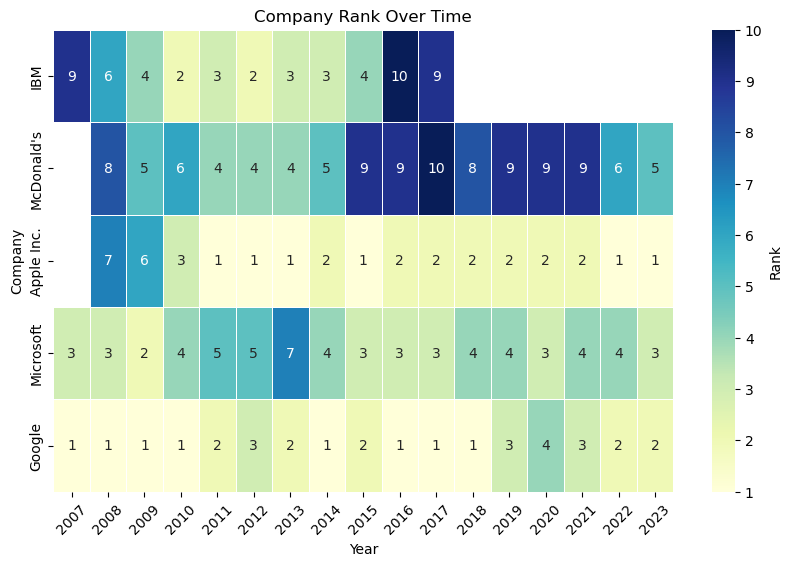

In [51]:
# Pivot table for heatmap
heat_df = df_long.pivot(index='Company', columns='Year', values='Rank')

# Filter top companies
heat_df = heat_df.loc[top_companies]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Rank'}, linewidths=0.5)
plt.title('Company Rank Over Time')
plt.xlabel('Year')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Rank 1 at top
plt.show()


## Question ##
#### Which of the valuable brands have stayed in the ranking in the 17-year period? ####

### Answer ###
* the values that are occuring in all of the 17 rows which represent years are Google and Microsoft
* Google has been in the top 4 over the indicated period
* Apple was in the top 2 for 13 out of the 17 year period
* Apple and Mcdonald's were both in the ranking 16 out of the 17-year span
* It can be concluded that Google, Apple and Microsoft purformed the best during this time period

### Further Study
What are the qualities from the companies under investigation that has made their brands strong?

### References ###
* seaborn heatmap: ChatGPT, response to “best visualization for rankings,” April 12, 2025, ChatGPT, https://chatgpt.com/
* reduce function: ChatGPT, response to “which value occurs in every row,” April 13, 2025, ChatGPT, https://chatgpt.com/
